## Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = # your cid
secret = # your secret
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [2]:
def factorDimensions(c):
    a, b, i = 1, c, 0
    while a < b:
        i += 1
        if c % i == 0:
            a = i
            b = c//a
    return (b, a)

In [3]:
song_colors = pd.read_csv('song-color.csv', engine='python')
song_colors.head()

,songName,songArtist,spotifyURI,r,g,b
0,1 2 365 4 Me,Kennen,spotify:track:6TtDPG6eFqDGooeyKYXaea,213,0,50
1,Suzanne,Bermuda Triangle,spotify:track:3MBZ0BaWosUjsn40TeYYk5,254,243,128
2,Trace,Micah Marcos,spotify:track:1CXeNAaiWBBOkpstvC8WJp,250,222,133
3,Hey There Delilah,Plain White T's,spotify:track:4RCWB3V8V0dignt99LZ8vH,255,214,98
4,???,Yuma Yamaguchi,spotify:track:3quI9fle27boUZXStQKtxy,254,219,0


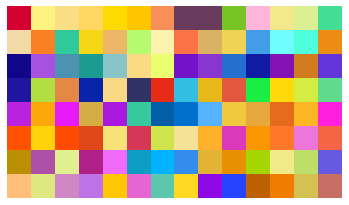

In [4]:
colors = np.array(song_colors[['r','g','b']])
indices = np.array(range(len(colors)))
indices.shape = factorDimensions(len(colors))

plt.imshow(colors[indices])
plt.axis("off")
plt.savefig("figures/colors.png")

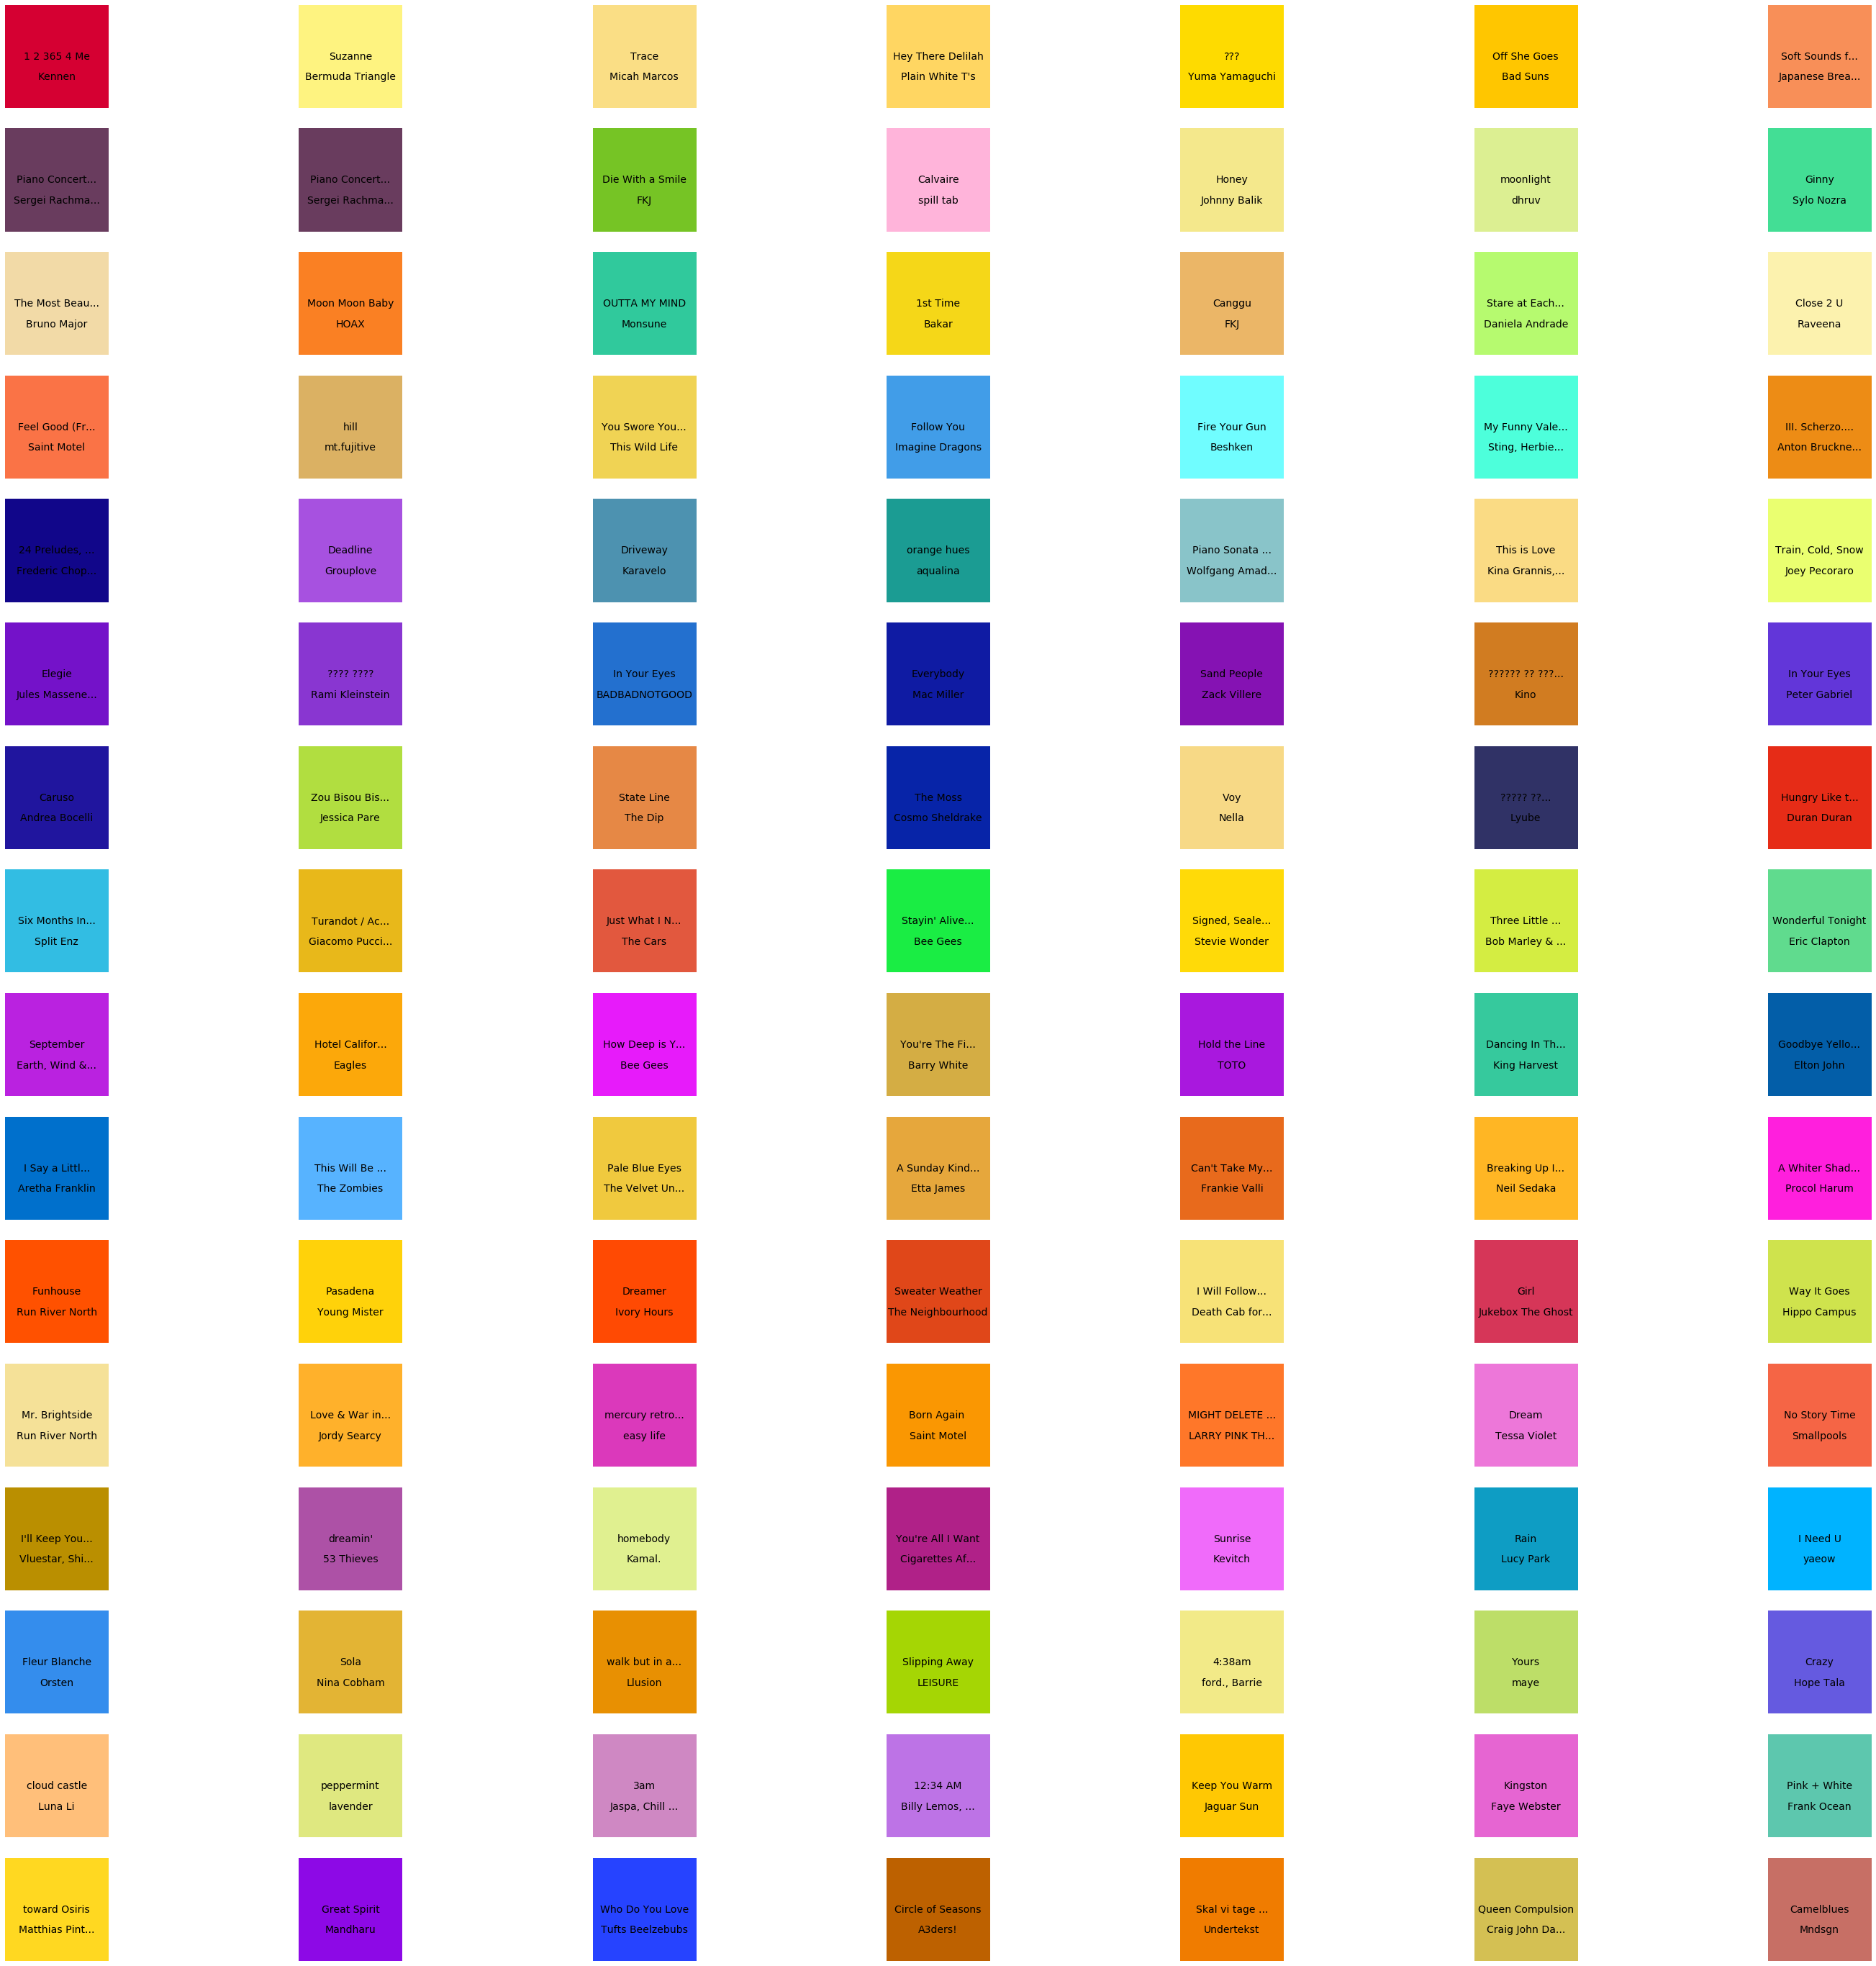

In [5]:
fig, ax = plt.subplots(len(colors)//7, 7, figsize=(50, 50))
i=0

for row in ax:
    for col in row:
        col.imshow(np.array([[[song_colors['r'][i], song_colors['g'][i], song_colors['b'][i]]]]))
        col.axis('off')
        
        if len(song_colors['songName'][i]) > 17:
            col.set_xlabel(song_colors['songName'][i][:13] + '...')
            col.text(0, 0, song_colors['songName'][i][:13] + '...',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=14)
        else:
            col.text(0, 0, song_colors['songName'][i],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=14)
            
        if len(song_colors['songArtist'][i]) > 17:
            col.text(0, 0.2, song_colors['songArtist'][i][:13] + '...',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=14)
        else:      
            col.text(0, 0.2, song_colors['songArtist'][i],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=14)
            
        i+=1

plt.savefig("figures/song_colors.png")

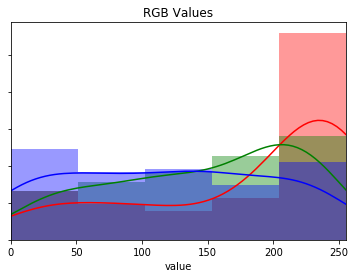

In [6]:
color_columns = ['r', 'g', 'b']


for color in color_columns:
    ax = sns.distplot(song_colors[color], color = color)
    ax.set_xlim([0, 255])
    ax.set_yticklabels([])
    ax.set(xlabel='value', title='RGB Values')

plt.savefig("figures/color_dist.png")

In [7]:
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []
time_signature = []

In [8]:
trackURIs = np.array(song_colors['spotifyURI'])

for i in range(len(trackURIs)):
    features = sp.audio_features(tracks=[trackURIs[i]])

    danceability = np.append(danceability, features[0]['danceability'])
    energy = np.append(energy, features[0]['energy'])
    key = np.append(key, features[0]['key'])
    loudness = np.append(loudness, features[0]['loudness'])
    mode = np.append(mode, features[0]['mode'])
    speechiness = np.append(speechiness, features[0]['speechiness'])
    acousticness = np.append(acousticness, features[0]['acousticness'])
    instrumentalness = np.append(instrumentalness, features[0]['instrumentalness'])
    liveness = np.append(liveness, features[0]['liveness'])
    valence = np.append(valence, features[0]['valence'])
    tempo = np.append(tempo, features[0]['tempo'])
    duration_ms = np.append(duration_ms, features[0]['duration_ms'])
    time_signature = np.append(time_signature, features[0]['time_signature'])

In [9]:
audio_features = pd.DataFrame({'danceability' : danceability, 'energy' : energy, 'key' : key, "loudness" : loudness,
                           'mode' : mode, "speechiness" : speechiness, "acousticness" : acousticness,
                            "instrumentalness" : instrumentalness, "liveness" : liveness, "valence" : valence,
                           "tempo" : tempo, "duration_ms" : duration_ms, "time_signature" : time_signature})

audio_features.to_csv("audio_features.csv")
audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.621,0.744,6.0,-5.881,1.0,0.0480,0.111,0.000005,0.3330,0.741,139.979,174857.0,4.0
1,0.799,0.480,9.0,-9.839,1.0,0.0690,0.533,0.015800,0.1310,0.635,113.428,177704.0,4.0
2,0.795,0.462,1.0,-11.212,0.0,0.0658,0.795,0.000006,0.1100,0.626,134.998,171928.0,4.0
3,0.656,0.291,2.0,-10.572,1.0,0.0293,0.872,0.000000,0.1140,0.298,103.971,232533.0,4.0
4,0.870,0.330,5.0,-12.329,1.0,0.0373,0.923,0.085000,0.0949,0.542,114.885,111000.0,4.0


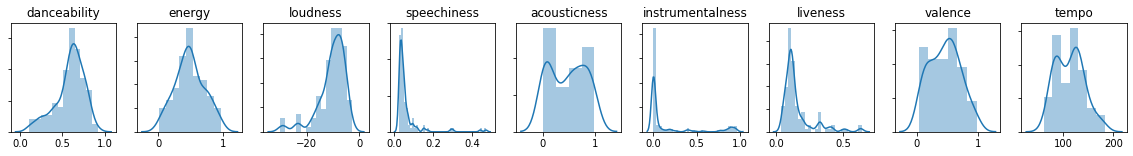

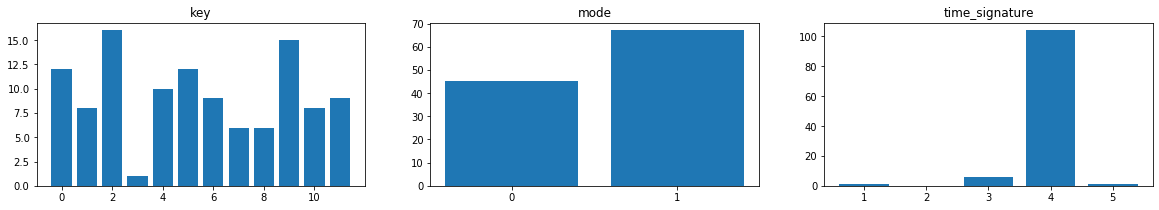

In [10]:
cont_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                'valence', 'tempo']
disc_columns = ['key', 'mode', 'time_signature']

f, axs = plt.subplots(1, 9, figsize=(20, 2))
for i in range(len(cont_columns)):
    sns.distplot(audio_features[cont_columns[i]], ax=axs[i])
    axs[i].set_yticklabels([])
    axs[i].set_xlabel(None)
    axs[i].set_title(cont_columns[i])

plt.savefig("figures/features_hist.png")
    

g, axs = plt.subplots(1, 3, figsize=(20, 3))
for i in range(len(disc_columns)):
    freq = audio_features[disc_columns[i]].value_counts().sort_index()
    axs[i].set_title(disc_columns[i])
    
    if disc_columns[i] == 'mode':
        axs[i].bar(list(map(str, map(int, freq.index))), freq.values)
    else:
        axs[i].bar(freq.index, freq.values)

plt.savefig("figures/features_bar.png")

## Model